In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [8]:
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [9]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis = 1)

In [ ]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
df.nunique()

Attrition_Flag                 2
Customer_Age                  45
Gender                         2
Dependent_count                6
Education_Level                7
Marital_Status                 4
Income_Category                6
Card_Category                  4
Months_on_book                44
Total_Relationship_Count       6
Months_Inactive_12_mon         7
Contacts_Count_12_mon          7
Credit_Limit                6205
Total_Revolving_Bal         1974
Avg_Open_To_Buy             6813
Total_Amt_Chng_Q4_Q1        1158
Total_Trans_Amt             5033
Total_Trans_Ct               126
Total_Ct_Chng_Q4_Q1          830
Avg_Utilization_Ratio        964
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


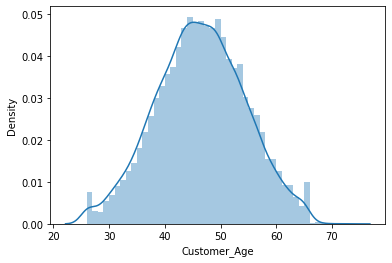

In [12]:
sns.distplot(df['Customer_Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


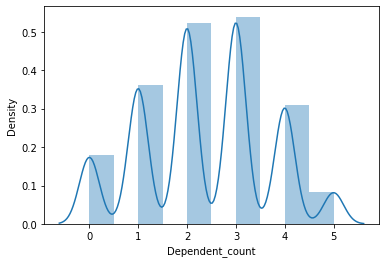

In [13]:
sns.distplot(df['Dependent_count'],bins = 10)

In [14]:
from scipy.stats import skew


In [15]:
print(skew(df['Dependent_count']))


-0.02082245083419453


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


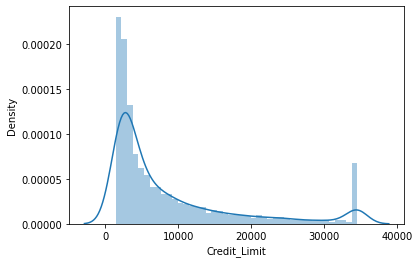

In [16]:
sns.distplot(df['Credit_Limit'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


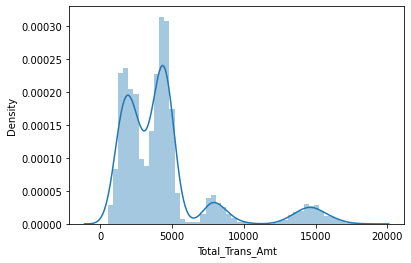

In [17]:
sns.distplot(df['Total_Trans_Amt'])


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


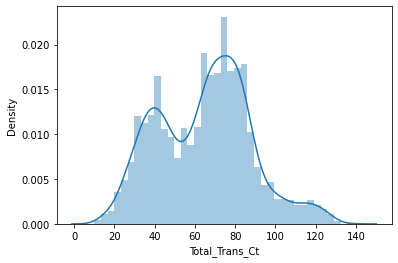

In [18]:
sns.distplot(df['Total_Trans_Ct'])


In [19]:
df['Total_Trans_Ct'].mean()


64.85869457884863

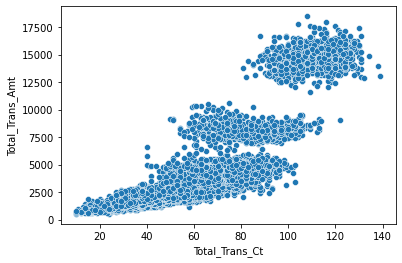

In [20]:
sns.scatterplot(x=df['Total_Trans_Ct'],y=df['Total_Trans_Amt'])


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


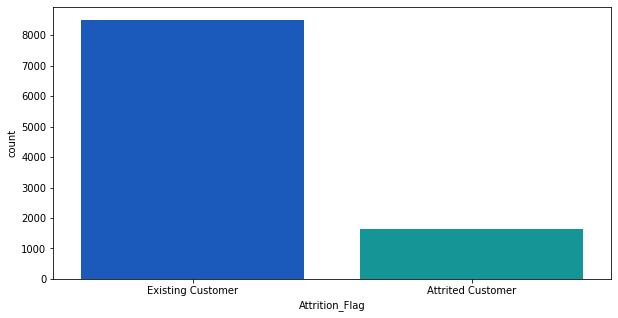

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(df['Attrition_Flag'],palette='winter')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


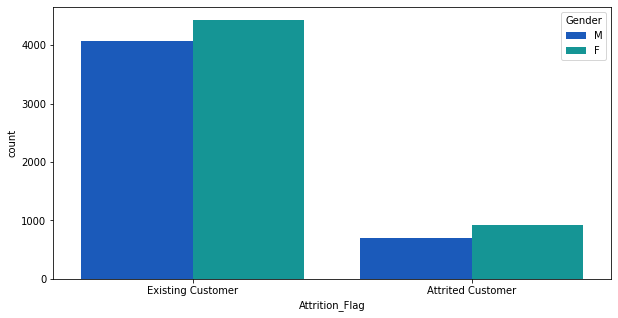

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(df['Attrition_Flag'],hue = df['Gender'],palette='winter')

In [23]:
ex.pie(df,names = 'Gender',width = 500,height = 300)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



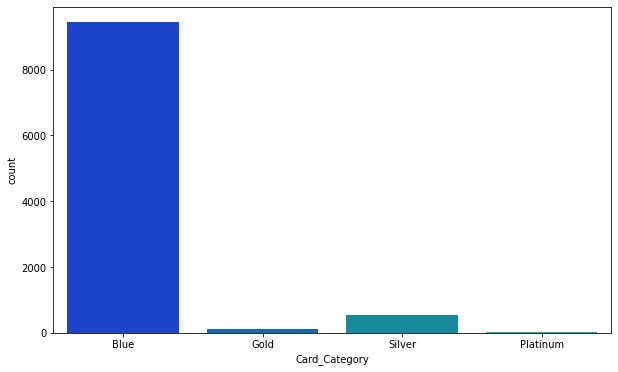

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(df['Card_Category'],palette='winter')

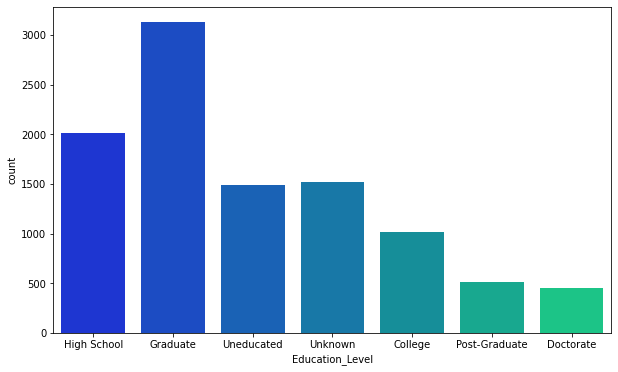

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(x = df['Education_Level'],palette='winter')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



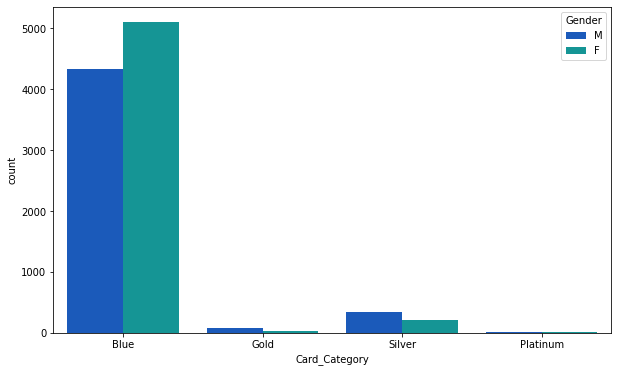

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['Card_Category'],hue = df['Gender'],palette='winter')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



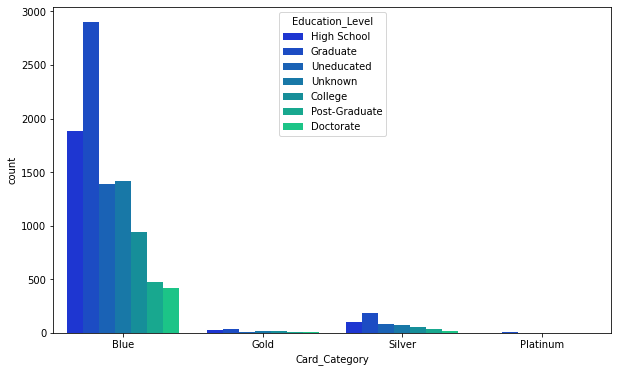

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['Card_Category'],hue = df['Education_Level'],palette='winter')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



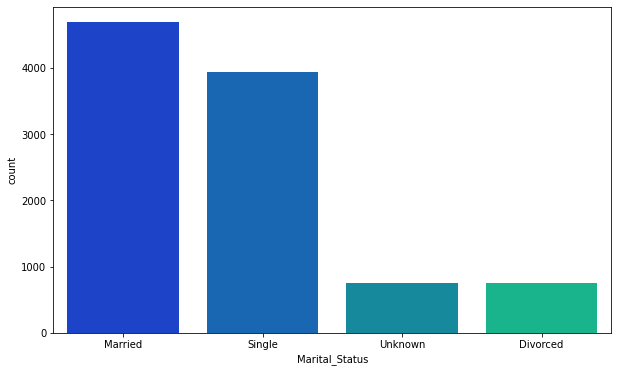

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['Marital_Status'],palette='winter')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



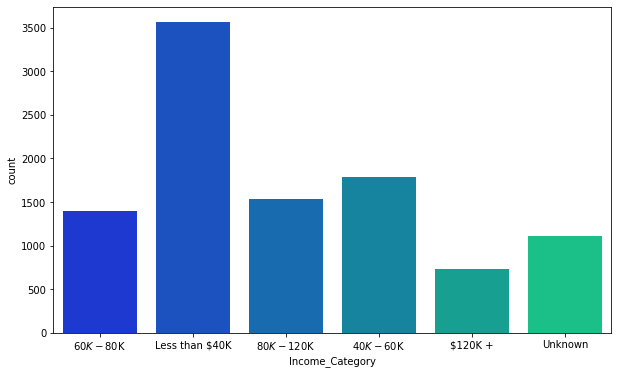

In [ ]:
plt.figure(figsize = (10,6))
sns.countplot(df['Income_Category'],palette='winter')


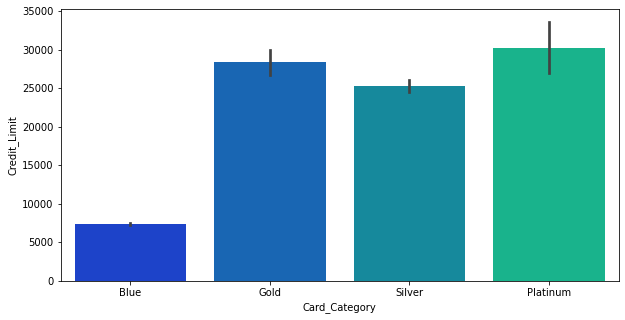

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x= df['Card_Category'],y=df['Credit_Limit'],palette='winter')


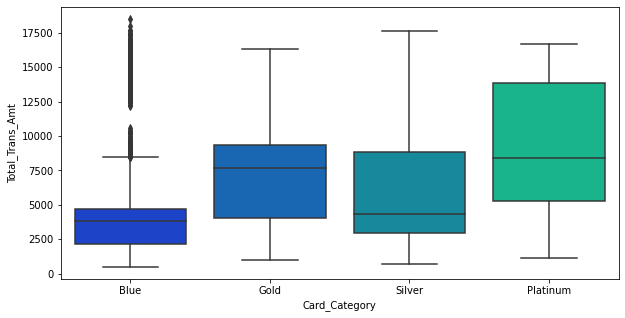

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x = df['Card_Category'],y = df['Total_Trans_Amt'],palette='winter')

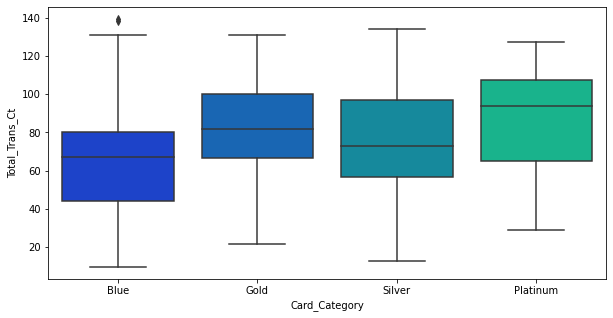

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Card_Category'],y=df['Total_Trans_Ct'],palette='winter')

In [28]:
'''
Dict1 = {'F':1,'M':2}
df['Gender'] = df.Gender.map(Dict1)

Dict2 = {'Graduate':3, 'High School':2, 'Unknown':0 ,'Uneducated':1, 'College':4, 'Post-Graduate':5 ,'Doctorate' : 6}
df['Education_Level'] = df.Education_Level.map(Dict2)

Dict3 = {'Unknown': 0, 'Single' : 1, 'Married' : 2 , 'Divorced' : 3}
df['Marital_Status'] = df.Marital_Status.map(Dict3) '''


"\nDict1 = {'F':1,'M':2}\ndf['Gender'] = df.Gender.map(Dict1)\n\nDict2 = {'Graduate':3, 'High School':2, 'Unknown':0 ,'Uneducated':1, 'College':4, 'Post-Graduate':5 ,'Doctorate' : 6}\ndf['Education_Level'] = df.Education_Level.map(Dict2)\n\nDict3 = {'Unknown': 0, 'Single' : 1, 'Married' : 2 , 'Divorced' : 3}\ndf['Marital_Status'] = df.Marital_Status.map(Dict3) "

In [29]:
from sklearn.preprocessing import LabelEncoder


In [30]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender)
df['Education_Level'] = le.fit_transform(df.Education_Level)
df['Marital_Status'] = le.fit_transform(df.Marital_Status)
df['Income_Category'] = le.fit_transform(df.Income_Category)
df['Card_Category'] = le.fit_transform(df.Card_Category)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
#SVC

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [39]:
X = df.drop(['Attrition_Flag'],axis = 1)
y = df['Attrition_Flag']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((7595, 19), (2532, 19), (7595,), (2532,))

In [42]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [43]:
svc.score(X_test,y_test)


0.8467614533965245

In [44]:
from sklearn import metrics


In [45]:
pred = svc.predict(X_test)


In [46]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
confusion_matrix


array([[   0,  388],
       [   0, 2144]])

In [47]:
from sklearn.metrics import classification_report,precision_score,recall_score


In [48]:
print(classification_report(y_test,pred))


                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       388
Existing Customer       0.85      1.00      0.92      2144

         accuracy                           0.85      2532
        macro avg       0.42      0.50      0.46      2532
     weighted avg       0.72      0.85      0.78      2532



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [49]:
precision_score(y_test,pred,pos_label='Existing Customer')


0.8467614533965245

In [50]:
recall_score(y_test,pred,pos_label='Existing Customer')


1.0

In [ ]:
#KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier


In [52]:
model= KNeighborsClassifier(n_neighbors=11,metric='manhattan')


In [53]:
model.fit(X_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=11)

In [54]:
model.score(X_test,y_test)


0.8937598736176935

In [55]:
model.score(X_train,y_train)


0.9095457537853852

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [57]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('/content/BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [58]:
print('Number of rows in the data = {}'.format(df.shape[0]))
print('Number of Columns in the data = {}'.format(df.shape[1]))

Number of rows in the data = 10127
Number of Columns in the data = 23


In [59]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [60]:
df.isna().sum()


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [61]:
df_clean = df.copy()


In [62]:
df_clean.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
                      , 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True)

In [63]:
df_clean.columns


Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

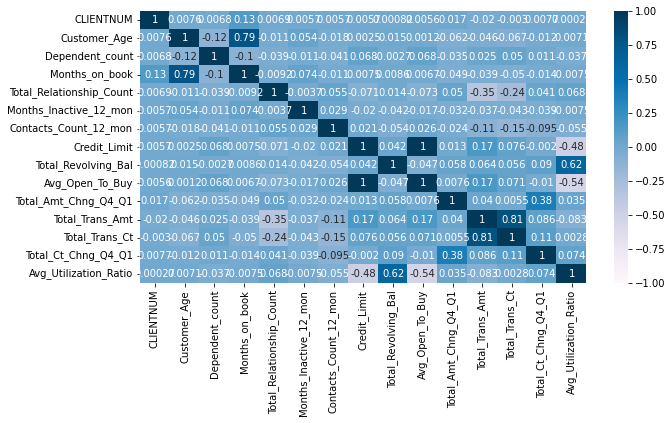

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 10})

fields_correlation = sns.heatmap(df_clean.corr(), vmin=-1, cmap="PuBu", annot=True, ax=ax)


In [65]:
df_clean = df_clean.drop(['CLIENTNUM'], axis=1) # no use
# df_clean = df_clean.drop(['Estimated'], axis=1) no longer required
df_clean = df_clean.drop(['Avg_Utilization_Ratio'], axis=1) # high correlation with other features
df_clean = df_clean.drop(['Months_on_book'], axis=1) # high correlation with other features
df_clean = df_clean.drop(['Avg_Open_To_Buy'], axis=1) # high correlation with other features
df_clean = df_clean.drop(['Total_Trans_Amt'], axis=1) # high correlation with other features

In [66]:
df_clean.columns


Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1'],
      dtype='object')

In [67]:
df_clean.describe()


,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,3.812580,2.341167,2.455317,8631.953698,1162.814061,0.759941,64.858695,0.712222
std,8.016814,1.298908,1.554408,1.010622,1.106225,9088.776650,814.987335,0.219207,23.472570,0.238086
min,26.000000,0.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,0.000000,10.000000,0.000000
25%,41.000000,1.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,0.631000,45.000000,0.582000
50%,46.000000,2.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,0.736000,67.000000,0.702000
75%,52.000000,3.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,0.859000,81.000000,0.818000
max,73.000000,5.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,3.397000,139.000000,3.714000


In [68]:
#Univariate Exploration¶


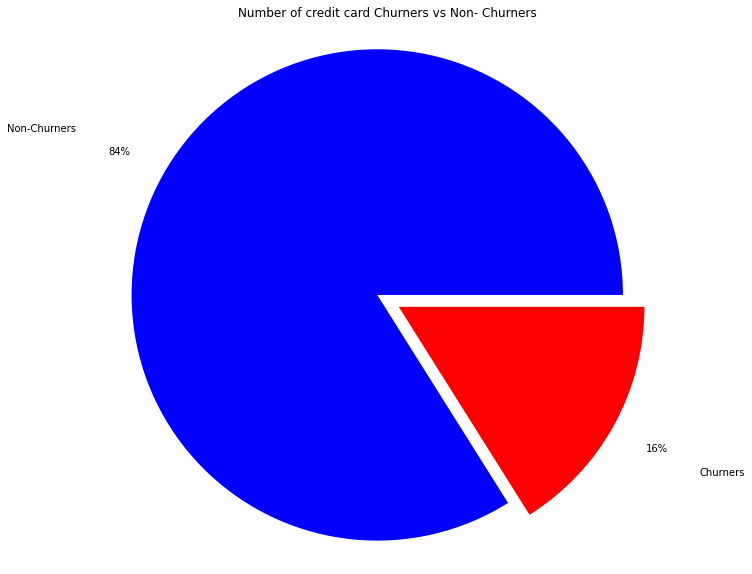

In [69]:
plt.figure(figsize=[10,10])
sorted_counts= df_clean.Attrition_Flag.value_counts()
plt.pie(sorted_counts, explode=(0.1,0),labels=['Non-Churners', 'Churners'],  
       colors=['Blue', 'Red'], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.title("Number of credit card Churners vs Non- Churners");

<Figure size 3600x432 with 0 Axes>

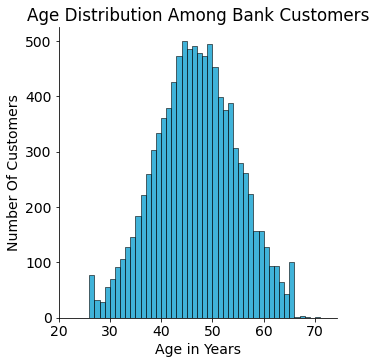

In [70]:
plt.rcParams['font.size']=14
plt.figure(figsize=[50,6])
max_age, min_age = df_clean.Customer_Age.max(),  df_clean.Customer_Age.min()
sns.displot(df_clean['Customer_Age'], bins= np.arange(min_age,max_age), color='#009ACD', kde=False )
plt.xticks(ticks=np.arange(20,80,10))
plt.title('Age Distribution Among Bank Customers')
plt.ylabel('Number Of Customers')
plt.xlabel('Age in Years');


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



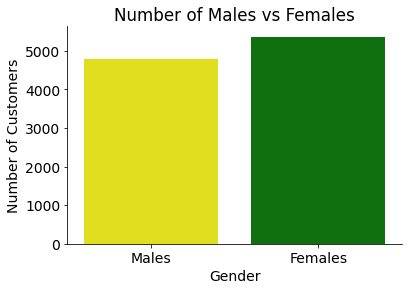

In [71]:
sns.countplot(df_clean['Gender'], palette=['Yellow', 'Green']);
sns.despine()
plt.title('Number of Males vs Females')
plt.xticks(ticks=[0,1], labels= ['Males', 'Females'])
plt.xlabel('Gender')
plt.ylabel('Number of Customers');

In [72]:
df_income= df_clean[df_clean.Income_Category != 'Unknown']
order_dict={'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4,
       '$120K +':5}

from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
sorted_counts = df_clean['Education_Level'].value_counts(sort=True)
df_income['Income_Level'] = df_income['Income_Category'].replace(order_dict).astype('float64')

<ipython-input-72-a52eb4f1ae7f>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



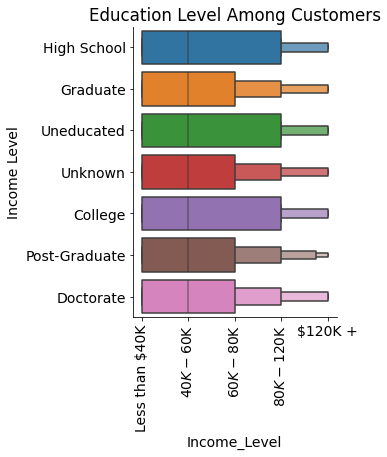

In [73]:
sns.catplot(data=df_income, y='Education_Level',   x='Income_Level', kind='boxen');
sns.despine()
plt.title('Education Level Among Customers')
plt.xticks(rotation = 90)
plt.ylabel('Education Level')
plt.ylabel('Income Level')
plt.xticks(ticks=[1,2,3,4,5], labels=['Less than $40K', '$40K - $60K', '$60K - $80K',  '$80K - $120K', 
       '$120K +']);

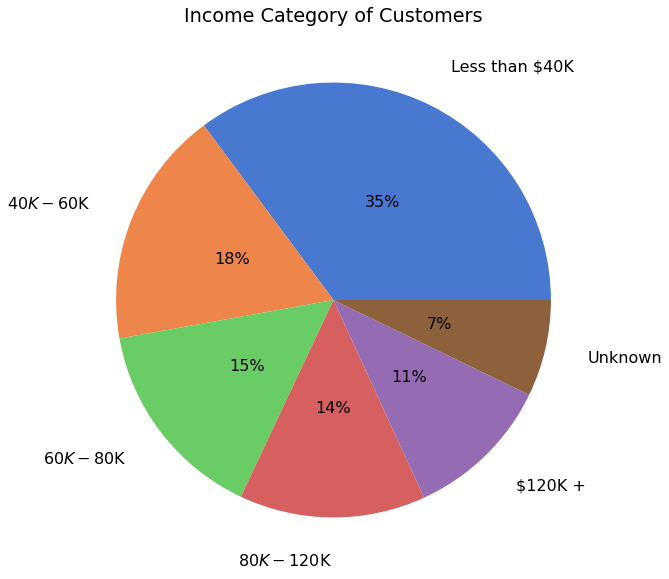

In [74]:
plt.rcParams['font.size'] = 16
plt.figure(figsize=[10,10])
sorted_counts = df_clean['Income_Category'].value_counts(sort=True)
plt.pie(sorted_counts, colors= sns.color_palette('muted'), labels=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', 
       '$120K +', 'Unknown'],autopct='%1.0f%%' , shadow=False, startangle=0,   
       pctdistance=0.5,labeldistance=1.2);
sns.despine()
plt.title('Income Category of Customers');

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_clean[['Customer_Age','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon'
                         ,'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal'
                         ,'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif


,VIF,features
0,19.525116,Customer_Age
1,4.031381,Dependent_count
2,6.733713,Total_Relationship_Count
3,6.057762,Months_Inactive_12_mon
4,5.535955,Contacts_Count_12_mon
5,1.927982,Credit_Limit
6,3.055788,Total_Revolving_Bal
7,13.911431,Total_Amt_Chng_Q4_Q1
8,8.036271,Total_Trans_Ct
9,11.783442,Total_Ct_Chng_Q4_Q1


In [76]:
data_f = df_clean.copy()
data_f = data_f.drop(['Customer_Age'], axis=1)
data_f = data_f.drop(['Total_Amt_Chng_Q4_Q1'], axis=1)
data_f = data_f.drop(['Total_Ct_Chng_Q4_Q1'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_f[['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon'
                         ,'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Total_Trans_Ct']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.918350,Dependent_count
1,5.396837,Total_Relationship_Count
2,5.331325,Months_Inactive_12_mon
3,4.967389,Contacts_Count_12_mon
4,1.907817,Credit_Limit
5,2.908767,Total_Revolving_Bal
6,6.022791,Total_Trans_Ct


In [79]:
data_f.describe(include='all')


,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct
count,10127,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,2,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Existing Customer,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN
freq,8500,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.346203,NaN,NaN,NaN,NaN,3.812580,2.341167,2.455317,8631.953698,1162.814061,64.858695
std,NaN,NaN,1.298908,NaN,NaN,NaN,NaN,1.554408,1.010622,1.106225,9088.776650,814.987335,23.472570
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1438.300000,0.000000,10.000000
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,2.000000,2.000000,2555.000000,359.000000,45.000000
50%,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,2.000000,2.000000,4549.000000,1276.000000,67.000000
75%,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,5.000000,3.000000,3.000000,11067.500000,1784.000000,81.000000


In [77]:
data_f.drop(['Card_Category'], axis=1)


,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Trans_Ct
0,Existing Customer,M,3,High School,Married,$60K - $80K,5,1,3,12691.0,777,42
1,Existing Customer,F,5,Graduate,Single,Less than $40K,6,1,2,8256.0,864,33
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,4,1,0,3418.0,0,20
3,Existing Customer,F,4,High School,Unknown,Less than $40K,3,4,1,3313.0,2517,20
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,5,1,0,4716.0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,M,2,Graduate,Single,$40K - $60K,3,2,3,4003.0,1851,117
10123,Attrited Customer,M,2,Unknown,Divorced,$40K - $60K,4,2,3,4277.0,2186,69
10124,Attrited Customer,F,1,High School,Married,Less than $40K,5,3,4,5409.0,0,60
10125,Attrited Customer,M,2,Graduate,Unknown,$40K - $60K,4,3,3,5281.0,0,62


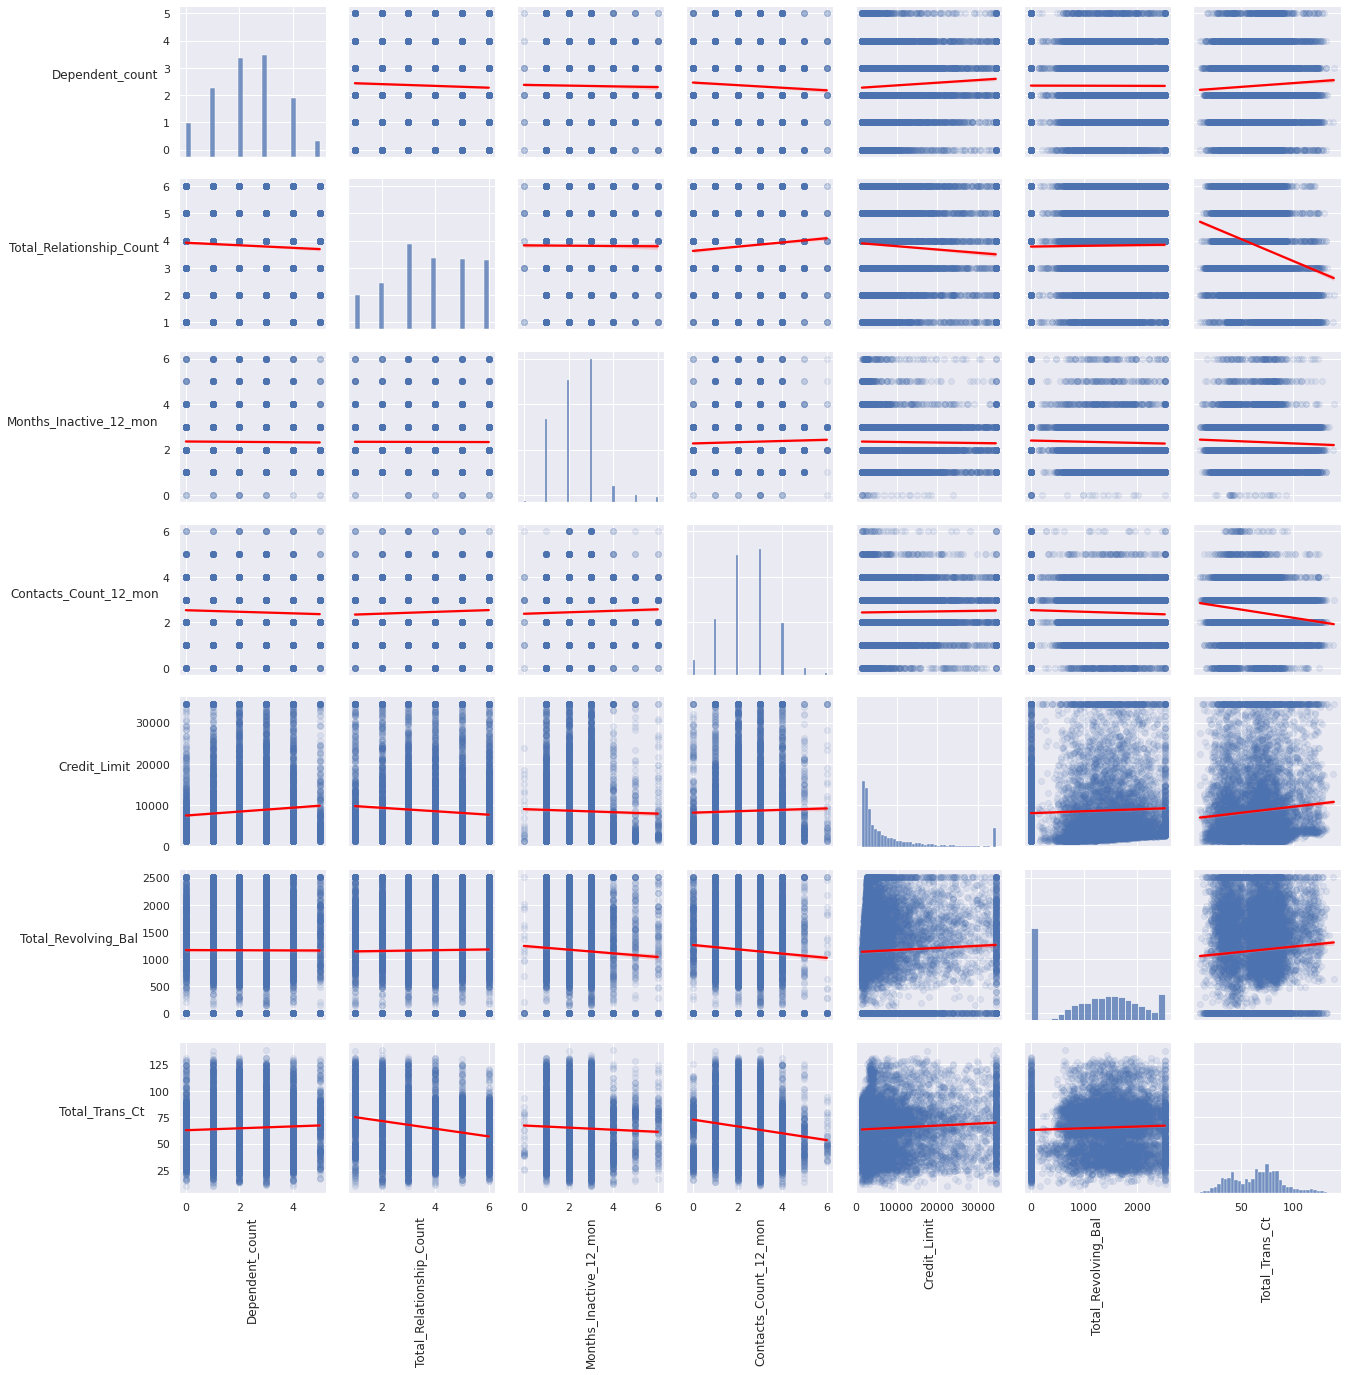

In [78]:
sns.set(font_scale = 1)
cols_to_plot = data_f.columns[1:len(data_f.columns)].tolist()
g=sns.pairplot(data_f[cols_to_plot], kind="reg",plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}},diag_kind="hist")
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

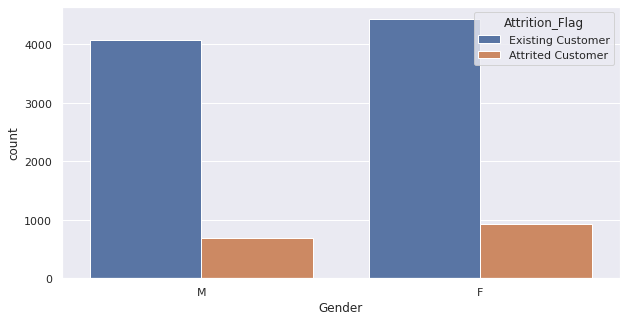

In [80]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Gender', hue = "Attrition_Flag", data = data_f, ax=ax)
plt.show()


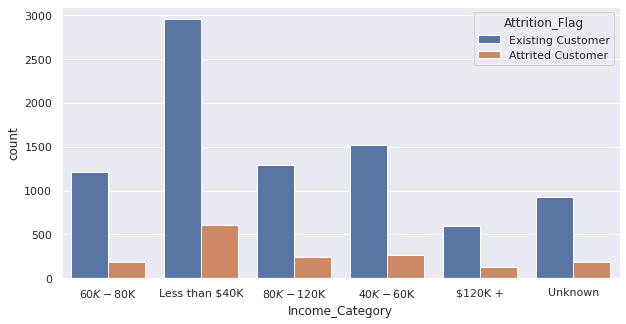

In [81]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Income_Category', hue = "Attrition_Flag", data = data_f, ax=ax)
plt.show()


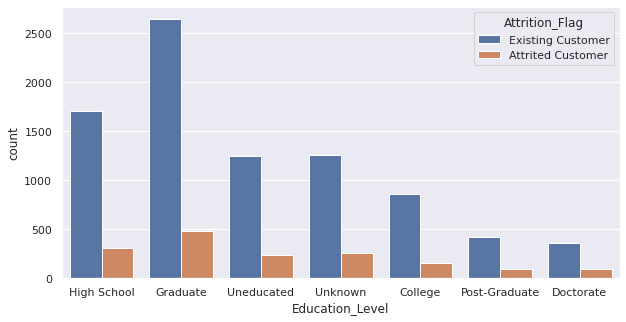

In [82]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Education_Level', hue = "Attrition_Flag", data = data_f, ax=ax)
plt.show()


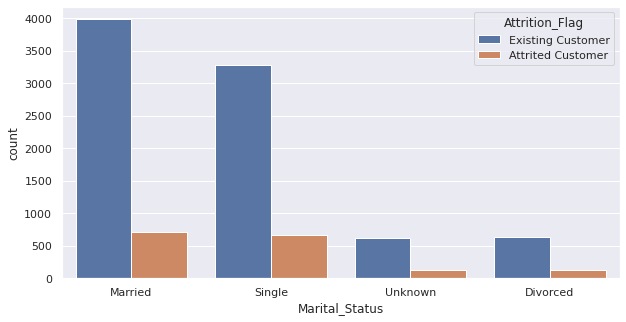

In [ ]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='Marital_Status', hue = "Attrition_Flag", data = data_f, ax=ax)
plt.show()

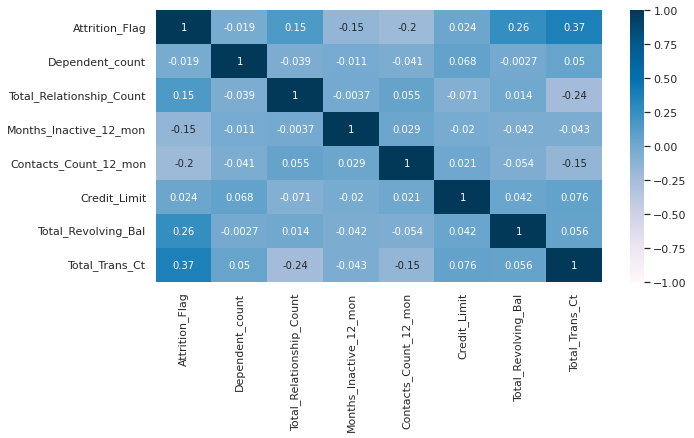

In [ ]:
data_f.loc[(data_f.Attrition_Flag == 'Existing Customer'),'Attrition_Flag'] = 1
data_f.loc[(data_f.Attrition_Flag == 'Attrited Customer'),'Attrition_Flag'] = 0
data_f = data_f.astype({"Attrition_Flag": int})
fig, ax = plt.subplots(figsize=(10,5))
plt.rcParams.update({'font.size': 10})

fields_correlation = sns.heatmap(data_f.corr(), vmin=-1, cmap="PuBu", annot=True, ax=ax)

In [ ]:
data_dummies = pd.get_dummies(data_f, drop_first=True)


In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from statsmodels.formula.api import ols
import plotly.graph_objs as gobj
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig  = px.histogram(data_dummies, x="Attrition_Flag", color="Attrition_Flag")
fig.show()

In [ ]:
data_shuffled = data_dummies.sample(frac = 1)


In [ ]:
X = data_shuffled.loc[:, data_shuffled.columns != 'Attrition_Flag']
y = data_shuffled.loc[:, data_shuffled.columns == 'Attrition_Flag']

In [ ]:
from sklearn.preprocessing import StandardScaler
project_name_scaler = StandardScaler()




In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# import the libraries needed to create the Custom Scaler
# note that all of them are a part of the sklearn package
# moreover, one of them is actually the StandardScaler module, 
# so you can imagine that the Custom Scaler is build on it

from sklearn.base import BaseEstimator, TransformerMixin

# create the Custom Scaler class

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [ ]:
cols=X.columns.values

df_numeric_cols=data_shuffled.select_dtypes(include='number')
col_num=len(df_numeric_cols.columns)-1

# select the columns to omit
columns_to_omit = cols[col_num:]
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in X.columns.values if x not in columns_to_omit]

# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
scaler.fit(X)

# standardizes the data, using the transform method 
# in the last line, we fitted the data - in other words
# we found the internal parameters of a model that will be used to transform data. 
# transforming applies these parameters to our data
# note that when you get new data, you can just call 'scaler' again and transform it in the same way as now
scaled_inputs = scaler.transform(X)

# check the shape of the inputs
scaled_inputs.shape

(10127, 25)

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Attrition_Flag'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of 0s in oversampled data",len(os_data_y[os_data_y['Attrition_Flag']==0]))
print("Number of 1s",len(os_data_y[os_data_y['Attrition_Flag']==1]))
print("Proportion of 0s data in oversampled data is ",len(os_data_y[os_data_y['Attrition_Flag']==0])/len(os_data_X))
print("Proportion of 1s data in oversampled data is ",len(os_data_y[os_data_y['Attrition_Flag']==1])/len(os_data_X))

length of oversampled data is  11822
Number of 0s in oversampled data 5911
Number of 1s 5911
Proportion of 0s data in oversampled data is  0.5
Proportion of 1s data in oversampled data is  0.5


In [ ]:
scaled_inputs = os_data_X
targets = os_data_y

In [ ]:
fig  = px.histogram(os_data_y, x="Attrition_Flag", color="Attrition_Flag")
fig.show()


In [ ]:
#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# import the 'metrics' module, which includes important metrics we may want to use
from sklearn import metrics

In [ ]:
reg = LogisticRegression(solver='liblinear', max_iter=100)


In [ ]:
t=targets.values.ravel()
reg.fit(scaled_inputs,t)


LogisticRegression(solver='liblinear')

In [ ]:
Logistic_Model_Score=reg.score(scaled_inputs,t)*100
Logistic_Model_Score

90.70377262730503

In [ ]:
feature_name = scaled_inputs.columns.values
summary_table = pd.DataFrame (columns=['Feature name'], data = feature_name)
summary_table['Coefficient'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()


In [ ]:
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)
summary_table.sort_values('Odds_ratio', ascending=False)


,Feature name,Coefficient,Odds_ratio
22,Income_Category_Unknown,2.542247,12.708192
18,Income_Category_$40K - $60K,2.358067,10.570497
21,Income_Category_Less than $40K,2.196871,8.996817
13,Education_Level_Uneducated,1.878152,6.541403
11,Education_Level_High School,1.784251,5.955117
15,Marital_Status_Married,1.783604,5.951264
12,Education_Level_Post-Graduate,1.772552,5.885852
10,Education_Level_Graduate,1.712258,5.541462
19,Income_Category_$60K - $80K,1.701219,5.480625
14,Education_Level_Unknown,1.694028,5.441356
